# Sähkötehon kehitys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib.util
import sys

try:
  import preprocessor as esik
except ModuleNotFoundError:
  file_path = "../Tehtava-03/preprocessor.py"; module_name = "preprocessor"; spec = importlib.util.spec_from_file_location(module_name, file_path)
  esik = importlib.util.module_from_spec(spec); sys.modules[module_name] = esik; spec.loader.exec_module(esik)

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

customer_segment = 'customer_segment_2'

cols = [customer_segment , 'year', 'system_size_DC']

df_all = esik.esik(cols)


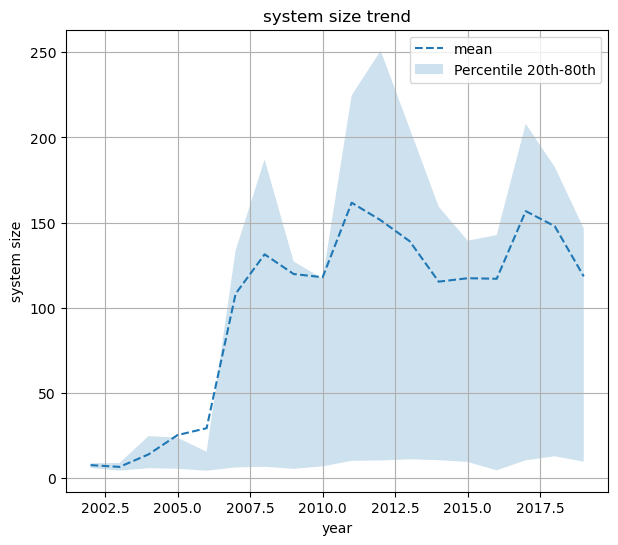

In [2]:
df = df_all.copy()

df = df[(df[customer_segment].isin(['NON-RES']))]
df = df[(df['year'] > 2001)]


q_high = 0.8
q_low = 0.2

year_s = df.groupby(['year'])


trend_mean = year_s['system_size_DC'].mean()
trend_q_high = year_s['system_size_DC'].quantile(q_high).to_numpy().T
trend_q_low = year_s['system_size_DC'].quantile(q_low).to_numpy().T

#print(trend_q_high)

x = df['year'].unique()
x.sort(axis=0)

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(trend_mean, linestyle='--', label='mean')
ax.fill_between(x, trend_q_low, trend_q_high, alpha=0.22, label=f'Percentile {str(int(100*q_low))}th-{str(int(100*q_high))}th')
ax.legend()

plt.xlabel('year')
plt.ylabel('system size')
plt.title('system size trend')
plt.grid()
plt.show()







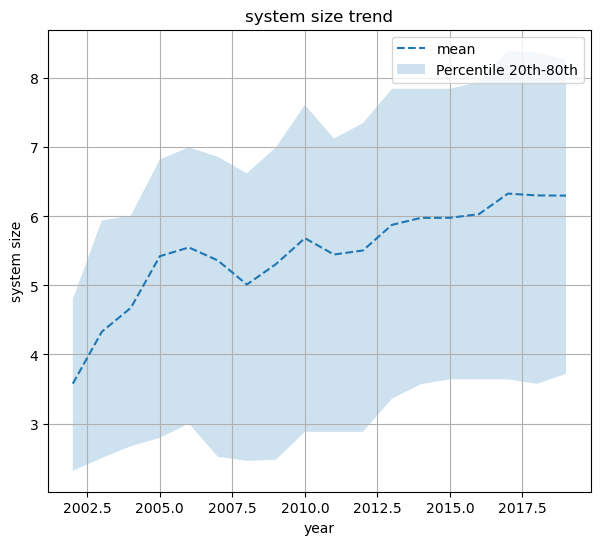

In [3]:
df = df_all.copy()

df = df[(df[customer_segment].isin(['RES']))]
df = df[(df['year'] > 2001)]



q_high = 0.8
q_low = 0.2

year_s = df.groupby(['year'])


trend_mean = year_s['system_size_DC'].mean()
trend_q_high = year_s['system_size_DC'].quantile(q_high).to_numpy().T
trend_q_low = year_s['system_size_DC'].quantile(q_low).to_numpy().T

#print(trend_q_high)

x = df['year'].unique()
x.sort(axis=0)

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(trend_mean, linestyle='--', label='mean')
ax.fill_between(x, trend_q_low, trend_q_high, alpha=0.22, label=f'Percentile {str(int(100*q_low))}th-{str(int(100*q_high))}th')
ax.legend()

plt.xlabel('year')
plt.ylabel('system size')
plt.title('system size trend')
plt.grid()
plt.show()
